PREPARING ENVIRONMENT

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

After looking at the dataset in the text file, it becomes apparent that values are separated using a tab delimiter. Thus, I will import the data as needed.

LOADING DATA

In [ ]:
# Reading the file according to unique delimiter
df = pd.read_csv('/content/diabetes.txt', delimiter='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


EDA

In [ ]:
#Code here
df.shape

(442, 11)

There are 442 rows present in the data, with 11 unique features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


The dataset describes medical data for a sample of people with diabetes. It includes features such as age, sex, Body Mass Index, blood pressure, and six individual blood sample measurements (the specifics of which are unknown), as well as a quantified measure of diabetes progression after 1 year.

Source for understanding features: https://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.html

There are no null values within the dataset, so that processing step may be skipped.

In [ ]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


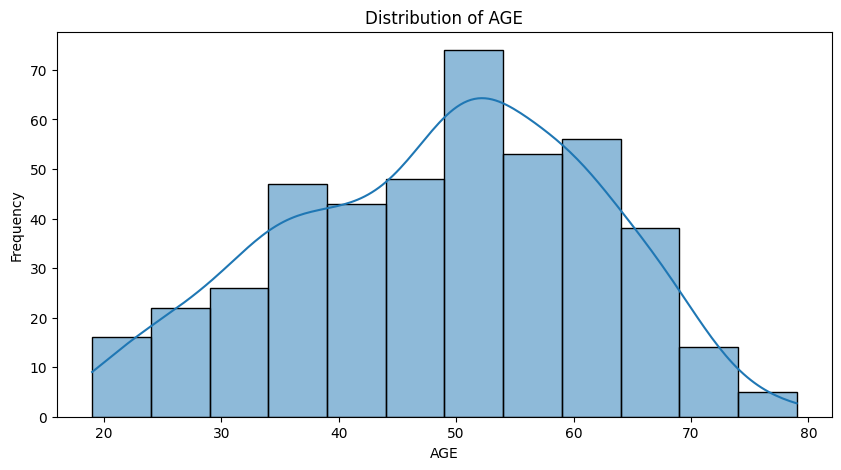

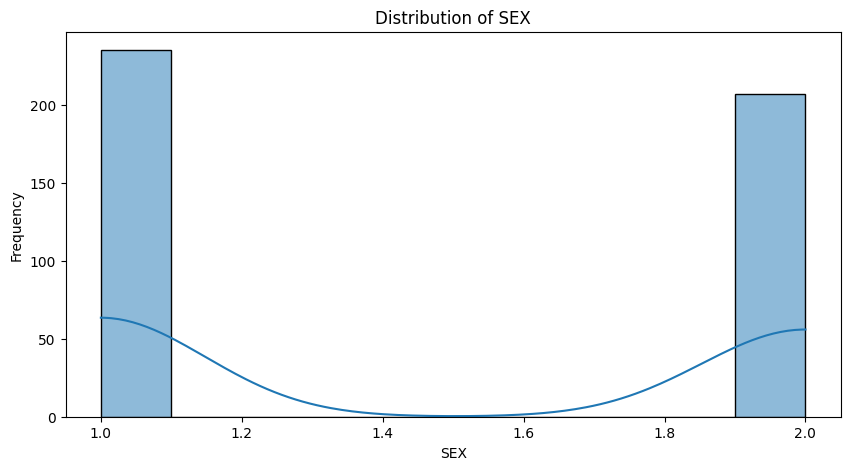

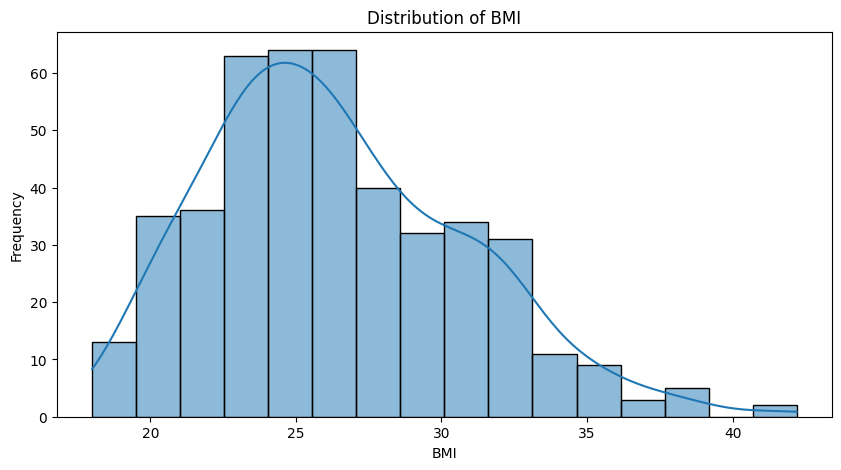

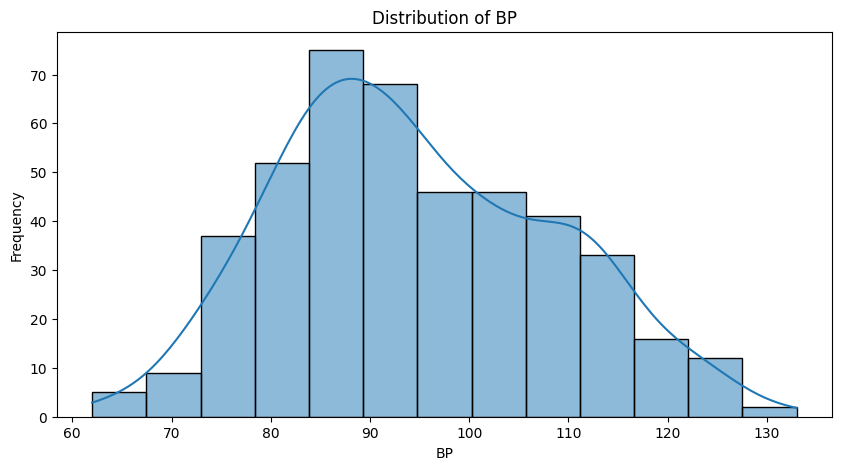

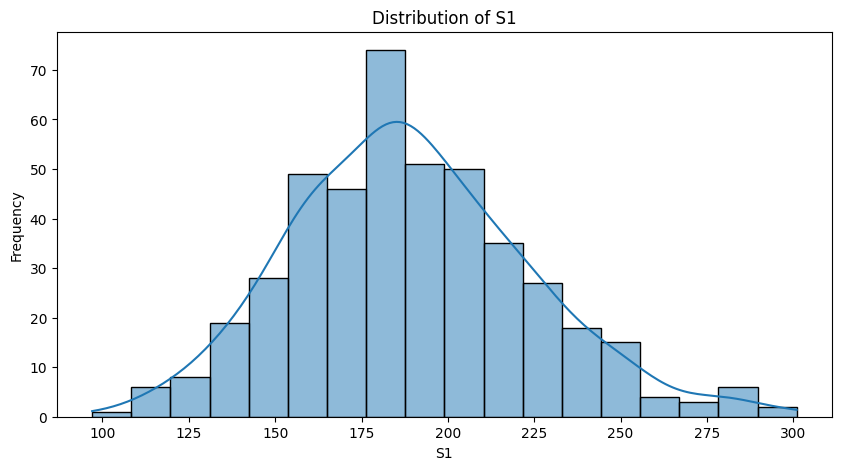

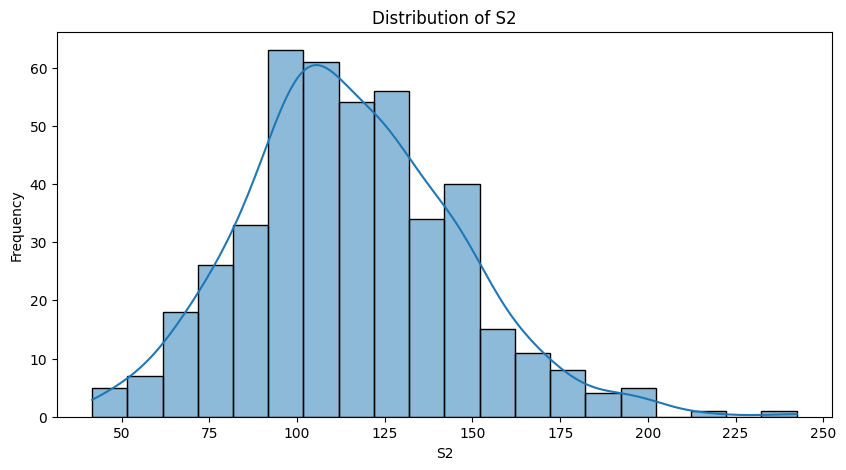

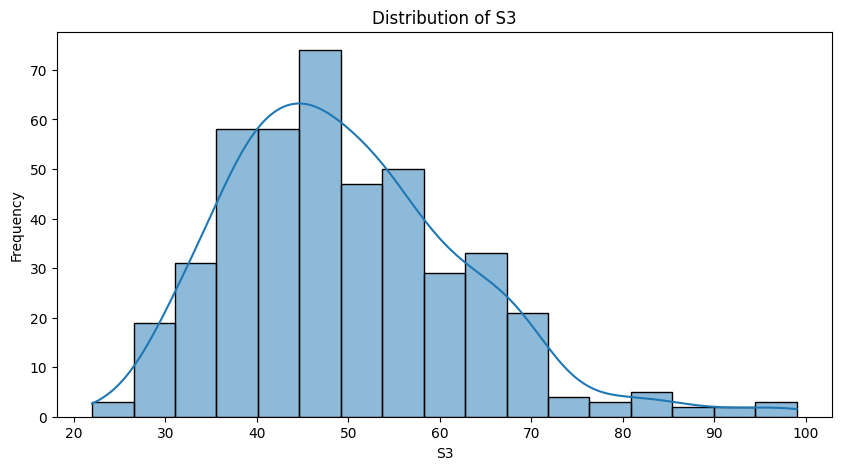

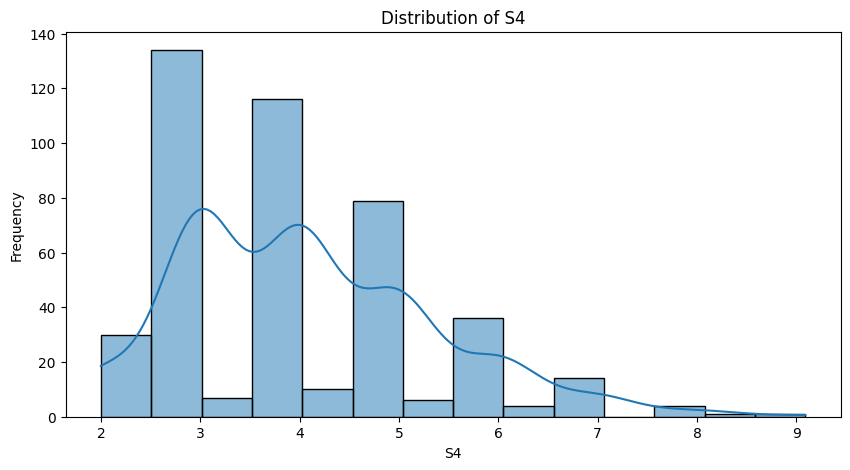

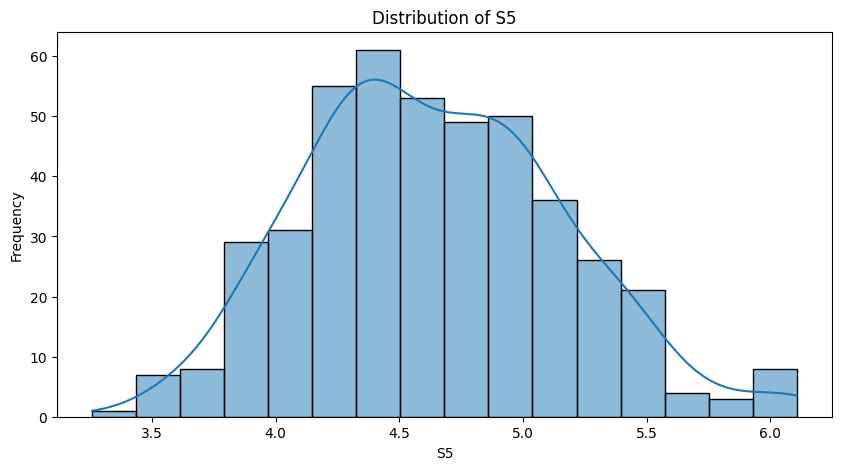

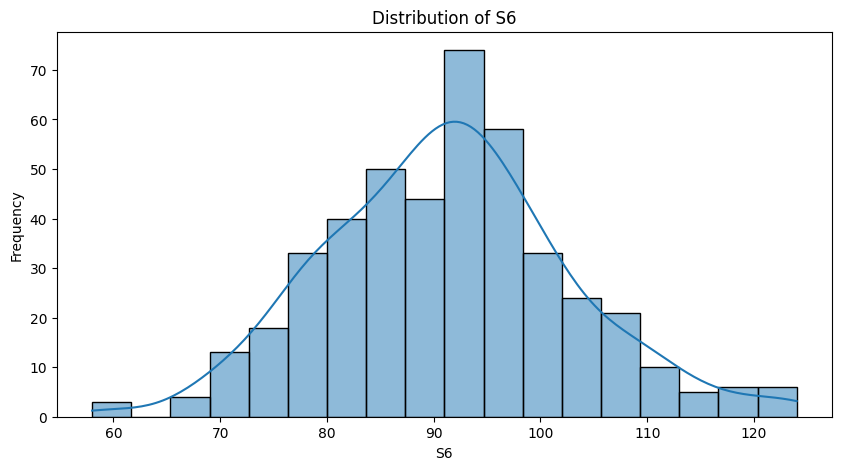

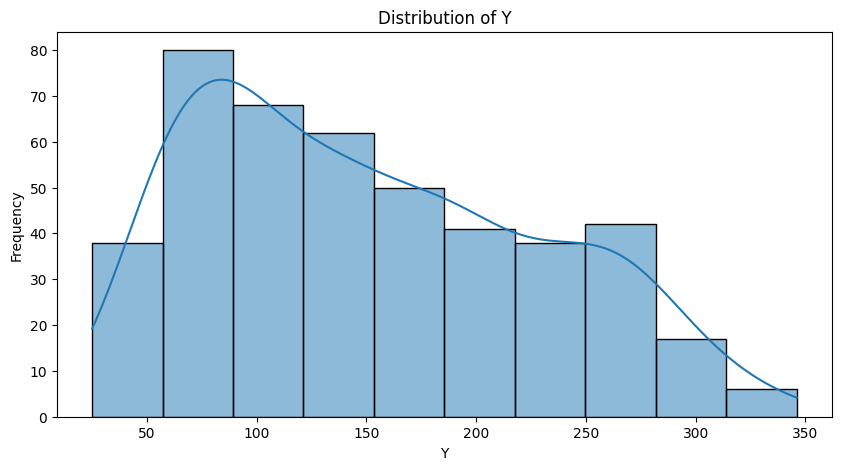

In [ ]:
# Visualizing distribution of each feature
for feature in df.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

Some interesting notes about the features:
*   The mean age in the dataset is roughly 49, with a standard deviation of 13.1 years. This means that late 30s may be a good time to start checking thoroughly for symptoms of diabetes.
*   The mean body mass index in the dataset is roughly 26, with a standard deviation of 4.4.
*   The mean blood pressure is 94.6, with a standard deviation of 13.8. Being represented as a single integer, it likely refers to Mean Arterial Pressure (MAP). According to research, an average MAP is anywhere from 70 to 100, so it makes sense that the mean in this dataset is within the high range of that. MAP does relate to systolic and diastolic measures of blood pressure, but I am slightly confused on the exact calculation.
(Source: https://www.healthline.com/health/mean-arterial-pressure)

Show the relationships between the target variable and the features using scatter plot and correlation analysis.

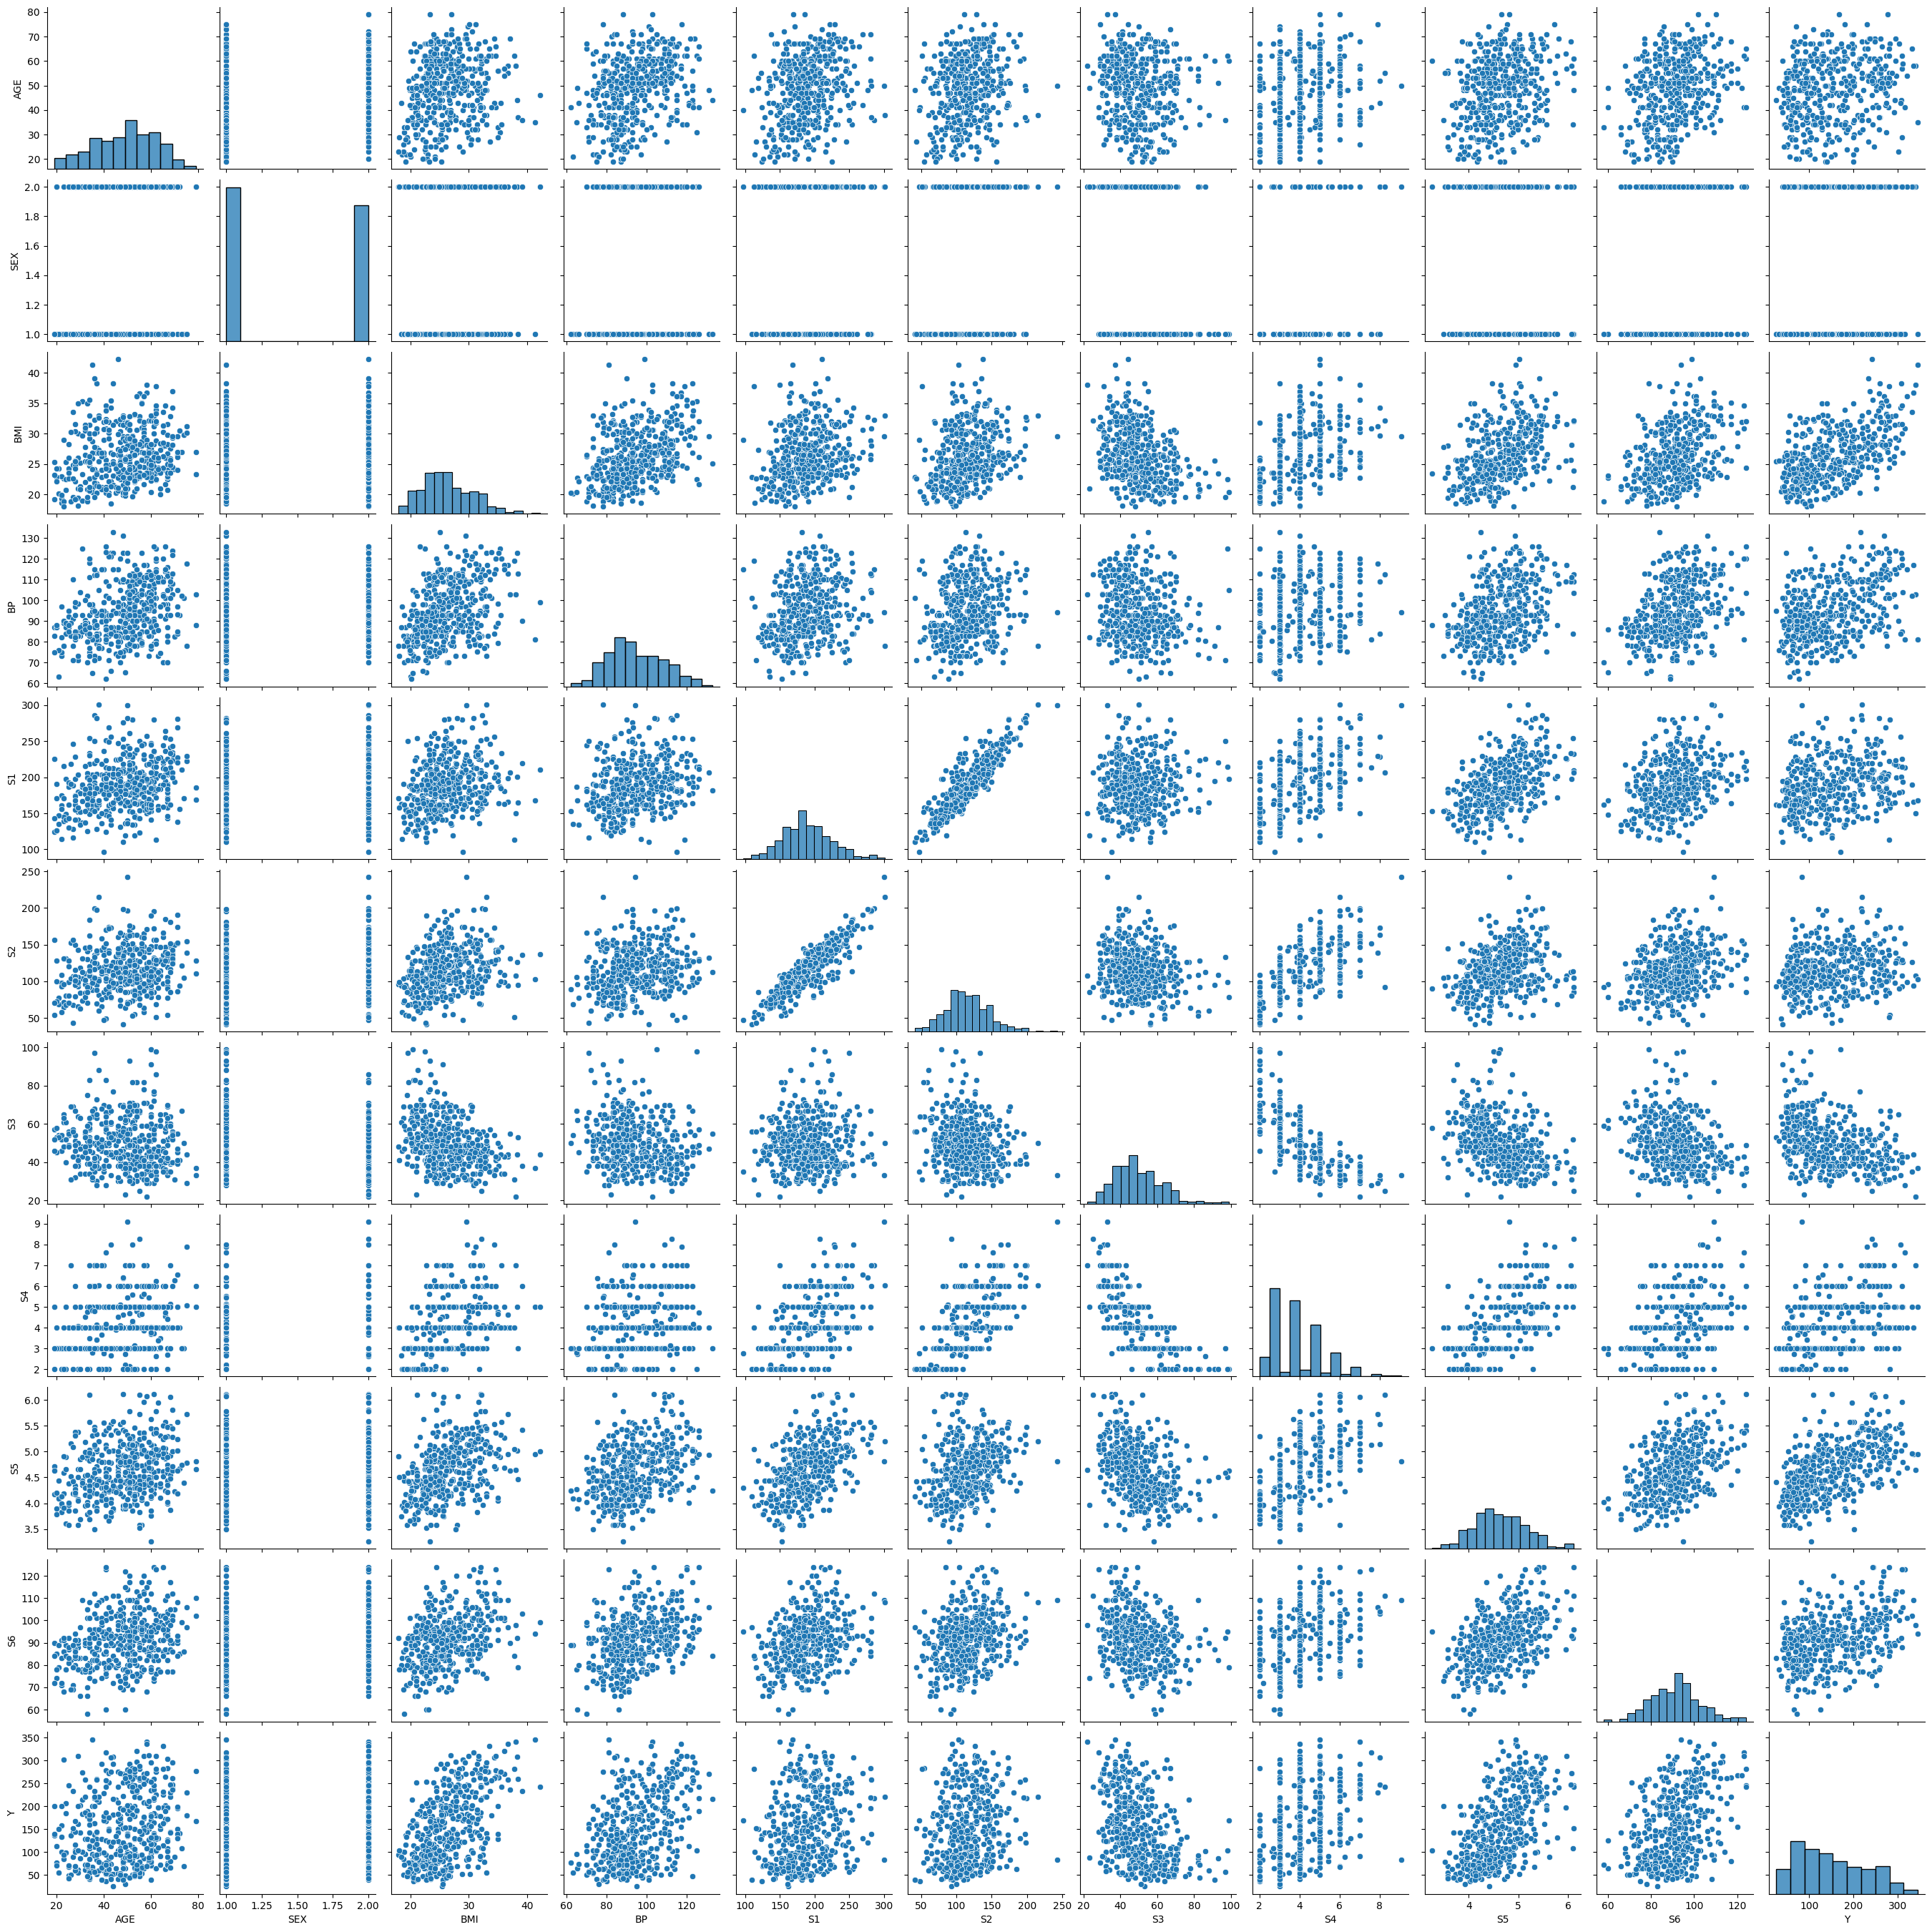

In [ ]:
# Pairplot
sns.pairplot(df)
plt.show()

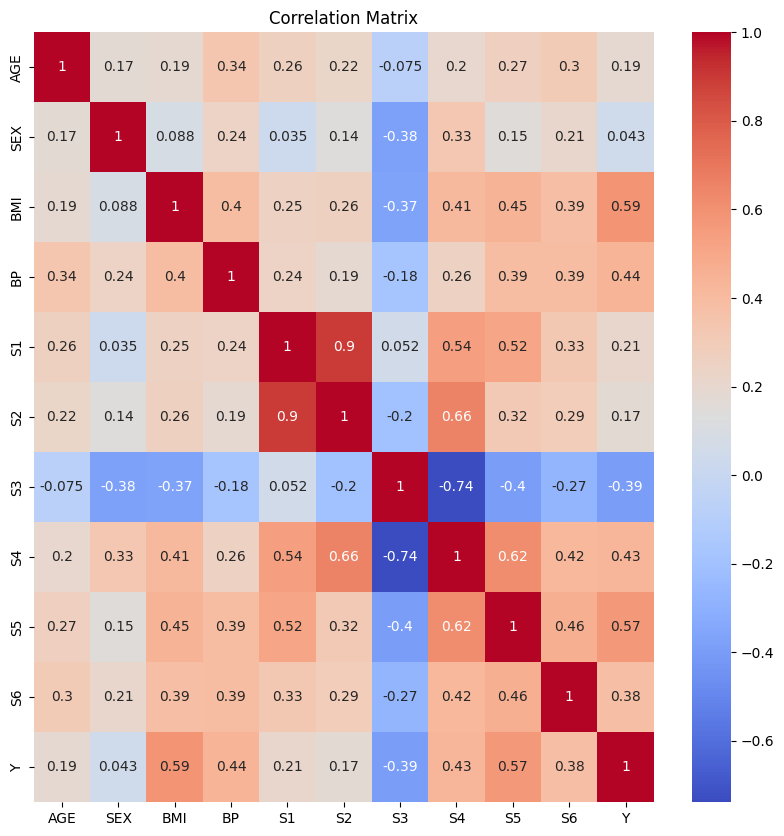

In [ ]:
#Calculating correlation matrix
df_corr = df.corr()

# Plotting results
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlating Features:


*   S1 has a strong linear relationship with S2, meaning that blood sample results 1 and 2 are positively correlated.
*   S2 has a relatively strong linear relationship with S4, meaning that blood sample results 2 and 4 are positively correlated.
*   The features that correlated most strongly with 'Y' (The measure of progression in diabetes over 1 year) are BMI and S5. Therefore, BMI and Blood Sample 5 may be good features to explore as indicators of diabetes progression.



ANALYSIS

Simple Linear Regression Model:

X: BMI

Y: Glucose/S6

The goal of this model is to predict Glucose levels in the S6 blood sample based solely on BMI. Then, the performance of the model will be evaluated.

In [ ]:
# Obtaining proper columns
X = df[['BMI']]
y = df['S6']

# Splitting the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(353, 1)

In [ ]:
X_test.shape

(89, 1)

In [ ]:
# Declaring model and training it on 80% training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting 20% data test results
y_pred = model.predict(X_test)
y_pred

array([ 90.92220352,  95.23534704,  91.1378607 ,  96.74494727,
        89.52043188,  89.08911752, 108.60609196,  96.09797575,
        82.51157365,  93.07877528,  88.22648882,  85.74643129,
        85.42294553,  92.97094669,  85.96208847,  92.10831799,
        98.68586186, 100.41111927,  94.37271834,  97.3919188 ,
        95.45100422,  87.25603153,  86.60906   ,  93.8335754 ,
        95.99014716,  92.97094669,  97.49974739,  89.73608905,
        84.12900247,  89.41260329, 100.84243362,  87.79517447,
        92.97094669,  90.92220352,  95.55883281,  99.33283339,
        88.442146  ,  88.22648882,  88.442146  ,  85.74643129,
        84.56031683,  88.54997458,  89.3047747 ,  88.22648882,
        87.04037435,  88.01083164,  87.90300306,  86.50123141,
        83.05071659,  91.67700364,  97.3919188 ,  84.56031683,
        93.29443246,  87.4716887 ,  89.73608905,  98.03889033,
        86.93254576,  97.71540457,  89.73608905,  86.06991706,
        94.58837551,  95.66666139,  96.96060445,  87.04

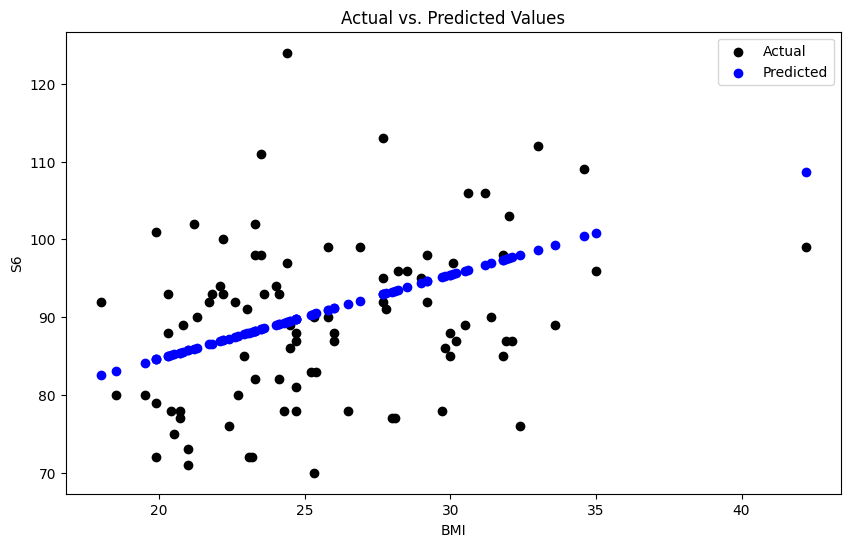

In [ ]:
# Visualizing results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['BMI'], y_test, color='black', label='Actual')
plt.scatter(X_test['BMI'], y_pred, color='blue', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('S6')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

The visualization shows the BMI vs the S6 glucose levels, with the predicted values represented as the blue dots. Although the line does roughly correlate with the upwards trend in the data, it fails to accurately capture the granular details of the range.

In [ ]:
# Calculating results performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 105.68552445503605
R-squared: 0.04970798932899945


According to the performance metrics, the model had a very high MSE and a low r-squared value. This means the model was not very accurate in predicting S6 glucose levels based on just BMI. Therefore, at least in this dataset, BMI alone may not be the best direct indicator of diabetes.

In [ ]:
Simple Linear Regression Model:

X: BMI, AGE

Y: Glucose/S6

The goal of this model is to predict Glucose levels in the S6 blood sample based on BMI and age. Then, the performance of the model will be evaluated.

In [ ]:
# Obtaining proper columns for analysis
X = df[['BMI', 'AGE']]
y = df['S6']

# Splitting the data into 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(353, 2)

In [ ]:
X_test.shape

(89, 2)

In [ ]:
# Declaring the model and training it on 80% training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting 20% data test results
y_pred = model.predict(X_test)
y_pred

array([ 93.37170818,  99.81461775,  94.54759703, 101.37290301,
        90.34060748,  89.75519538, 106.38288518,  94.31250526,
        78.32530953,  89.625832  ,  86.22921704,  86.54302577,
        81.14832988,  93.84632725,  85.75628618,  90.12408607,
       100.18013202, 102.91430612,  92.36338253,  99.40520992,
        91.1773644 ,  90.26020231,  84.76990732,  96.78351706,
        92.2525895 ,  95.02390432,  98.52118302,  91.90902202,
        81.74724769,  90.43958301, 101.34082694,  82.50359943,
        92.66875019,  92.39039396, 100.30274254,  94.28718205,
        88.19015727,  88.38810833,  92.311677  ,  87.32807715,
        85.08033962,  92.40896431,  91.71613561,  94.4722565 ,
        89.67310199,  87.40848232,  82.99341244,  88.59787688,
        82.73700299,  88.3610969 ,  97.05005579,  79.97750567,
        94.53071489,  88.88467419,  87.00245092,  95.86741409,
        86.04308348,  99.10828334,  88.37629083,  84.47973359,
        92.95048285,  92.94204178,  93.12817534,  88.29

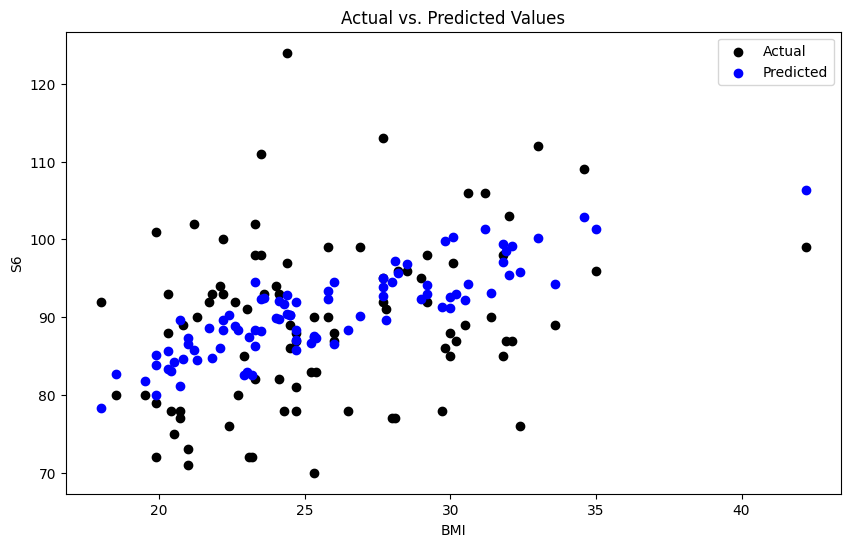

In [ ]:
# Visualizing results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['BMI'], y_test, color='black', label='Actual')
plt.scatter(X_test['BMI'], y_pred, color='blue', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('S6')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

The visualization shows the BMI vs the S6 glucose levels (this time with Age being included as a factor), with the predicted values represented as the blue dots. The model's predictions were more accurate than before, indicating that age and BMI combined are better indicators of glucose levels than BMI alone. However, it was still not entirely accurate.

In [ ]:
# Calculating results performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 93.82351490758768
R-squared: 0.15636756226076043


According to the performance metrics, this model had a high MSE and a low r-squared value. This means the model was not very accurate in predicting S6 glucose levels based on BMI and age combined. However, this model performed better than the model that evaluated based purely off of BMI.

RESULTS

EDA demonstrated that features such as BMI and blood sample 5 (S5) positively correlate with the quantitative measure of diabetes progression over a year (Y).

Regression analysis using exclusively BMI to predict glucose (s6) captured the general trend in S6, but failed to accurately capture granular results and had poor MSE and R-Squared scores.

Regression analysis using BMI and age to predict glucose (S6) performed better than the previous model, offering hope into predicting S6 levels with further analysis. However, the model still failed to accurately capture granular details and had poor MSE and R-Squared scores.

NEXT STEPS

Further regression analysis using more features may prove beneficial. I recommend including features such as sex and blood pressure when predicting glucose levels in blood sample 6. This may allow for more accurate models with acceptable performance scores.

I also recommend using age, BMI, blood pressure, and blood sample 5 in a regression model to predict the progression of diabetes (Y).